<a href="https://colab.research.google.com/github/edmenciab733/odir/blob/main/odir_paso3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/Work/Oftalmologia/ODIR-5K/ODIR-5K/raw_data.pickle'

In [ ]:
cargado = True
if cargado == True:
  data = pd.read_pickle(data_path)
  data.head()

In [ ]:
data.loc[data['label'] == 'G', 'label'] = 'G'
data.loc[data['label'] == 'SG', 'label'] = 'G'

In [ ]:
data['label'].value_counts()

N    2817
D    1390
O     813
C     263
M     240
A     238
G     202
H     104
Name: label, dtype: int64

In [ ]:
anomalia_alias = 'M'
anomalia_nombre = 'Miopia'

In [ ]:
df_normal = data[data['label'] == 'N']
df_anomalia = data[data['label'] == anomalia_alias]
df_t = pd.concat([df_normal, df_anomalia])
df_t.loc[df_t['label'] == 'N', 'label_numeric'] = 0
df_t.loc[df_t['label'] == anomalia_alias, 'label_numeric'] = 1

In [ ]:
df_t['label'].value_counts()

N    2817
M     240
Name: label, dtype: int64

In [ ]:
XX = df_t['Image'].to_numpy()
yy = df_t['label_numeric'].to_numpy()

In [ ]:
XX = np.array([np.array(val) for val in XX])

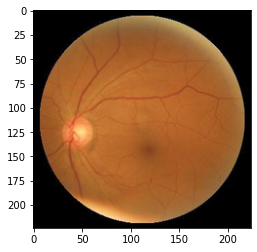

In [ ]:
imgplot = plt.imshow(XX[1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.25, random_state=42, stratify=yy)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.applications.vgg19 import VGG19

In [ ]:
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(224,224,3))
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
classifier = Sequential()
classifier.add(vgg)
#classifier.add(Conv2D(filters = 32,kernel_size = (3, 3),  input_shape = (224, 224, 3), activation = "relu"))
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3)))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = "relu"))
classifier.add(Dropout(0.1))
classifier.add(Dense(units = 64, activation = "relu"))
classifier.add(Dropout(0.1))
classifier.add(Dense(units = 1, activation = "sigmoid"))
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"], )
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 32)          147488    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
epochs= 15
historia = classifier.fit(X_train, y_train , batch_size=64, epochs=epochs, validation_split=0.2,validation_data=(X_train, y_train ), )

Epoch 1/15
36/36 [==============================] - 33s 897ms/step - loss: 0.3627 - accuracy: 0.9372 - val_loss: 0.0474 - val_accuracy: 0.9865
Epoch 2/15
36/36 [==============================] - 29s 814ms/step - loss: 0.0645 - accuracy: 0.9817 - val_loss: 0.0450 - val_accuracy: 0.9895
Epoch 3/15
36/36 [==============================] - 28s 786ms/step - loss: 0.0406 - accuracy: 0.9878 - val_loss: 0.0136 - val_accuracy: 0.9965
Epoch 4/15
36/36 [==============================] - 28s 780ms/step - loss: 0.0270 - accuracy: 0.9921 - val_loss: 0.0056 - val_accuracy: 0.9969
Epoch 5/15
36/36 [==============================] - 28s 793ms/step - loss: 0.0236 - accuracy: 0.9935 - val_loss: 9.9901e-04 - val_accuracy: 0.9996
Epoch 6/15
36/36 [==============================] - 28s 787ms/step - loss: 0.0163 - accuracy: 0.9956 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 7/15
36/36 [==============================] - 28s 783ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0015 - val_accuracy: 0.

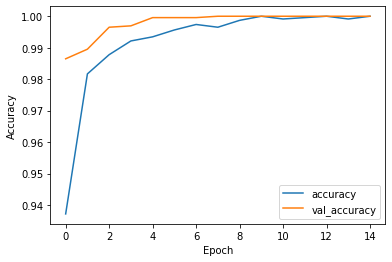

In [ ]:
plt.plot(historia.history['accuracy'], label='accuracy')
plt.plot(historia.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
test_evaluate = classifier.evaluate(X_test, y_test)
print('Test loss:', test_evaluate[0])
print('Test accuracy:', test_evaluate[1])

24/24 [==============================] - 7s 301ms/step - loss: 0.1764 - accuracy: 0.9791
Test loss: 0.17643019556999207
Test accuracy: 0.9790849685668945


In [ ]:
classifier.save("/content/drive/MyDrive/Work/Oftalmologia/ODIR-5K/ODIR-5K/modelos/{}.h5".format(anomalia_nombre))

In [ ]:
y_pred  = (classifier.predict(X_test) > 0.5).astype("int32")

24/24 [==============================] - 5s 192ms/step


In [ ]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       705
         1.0       0.92      0.80      0.86        60

    accuracy                           0.98       765
   macro avg       0.95      0.90      0.92       765
weighted avg       0.98      0.98      0.98       765



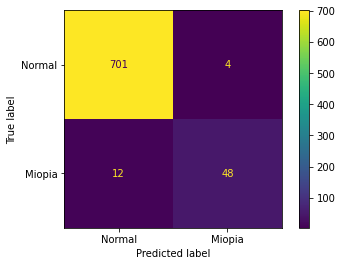

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Normal', anomalia_nombre], )
cm_display.plot()
plt.show()

In [ ]:
def predict(path):
  image_predict = mpimg.imread(path)
  image_predict = np.expand_dims(image_predict, axis = 0)
  result = classifier.predict(image_predict, verbose=0)
  result = result.argmax(axis=-1)
  return result

In [ ]:
predict("/content/drive/MyDrive/Work/Oftalmologia/ODIR-5K/ODIR-5K/resize/training/2221_right.jpg")

array([[0.90621537]], dtype=float32)